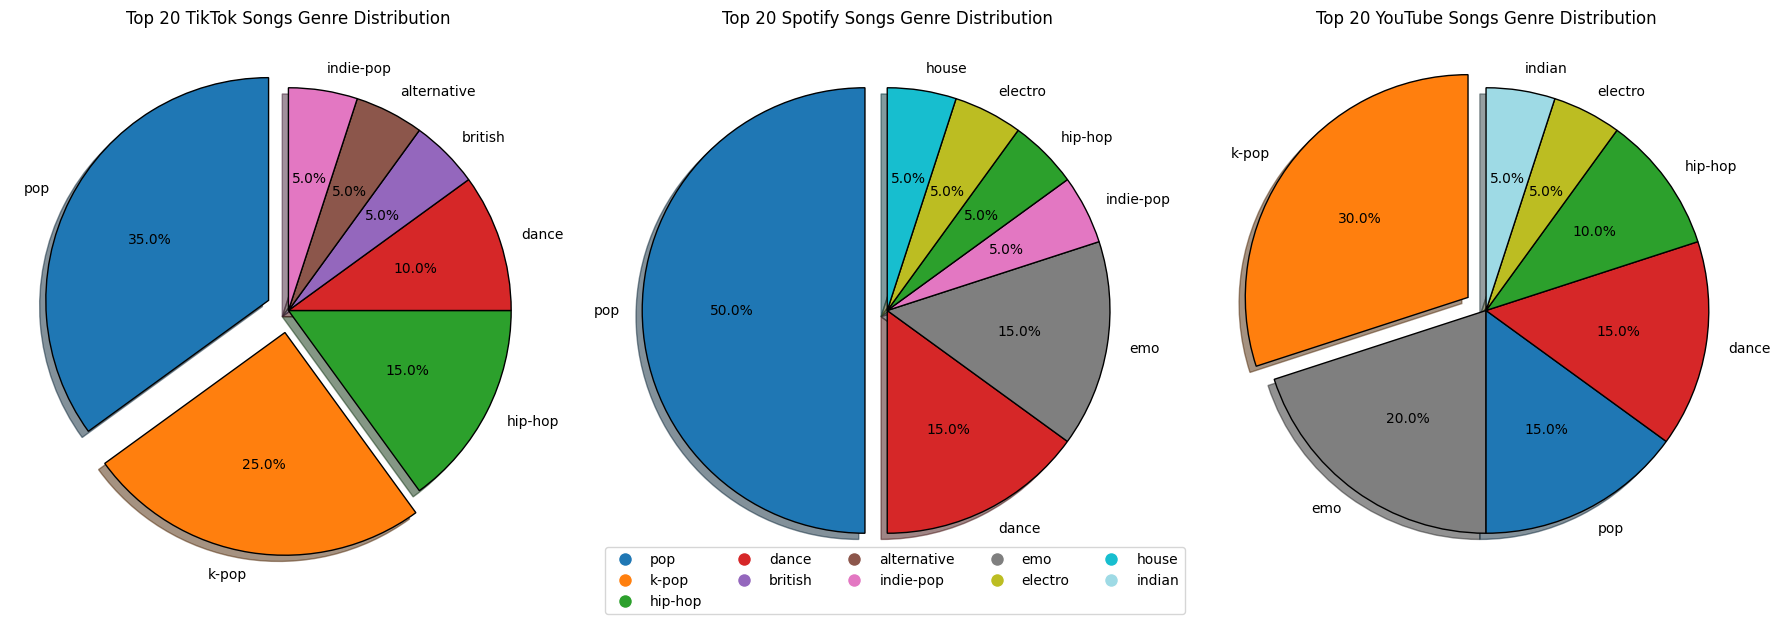

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('../../datasets/merged.csv')

# Convert 'Release Date' to datetime format and extract the release year
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%m-%Y')
df['Release Year'] = df['Release Date'].dt.year

# Filter the data for songs released between 2018 and 2022
df_filtered = df[df['Release Year'].between(2018, 2022)]

# Get top 20 songs for each platform (TikTok, Spotify, YouTube)
df_copy = df_filtered.copy()
tiktok_top_songs = df_copy.nlargest(20, 'TikTok Views').assign(Platform='TikTok')
spotify_top_songs = df_copy.nlargest(20, 'Spotify Streams').assign(Platform='Spotify')
youtube_top_songs = df_copy.nlargest(20, 'YouTube Views').assign(Platform='YouTube')

# Combine all top 20 songs into a single DataFrame
top_20_songs = pd.concat([tiktok_top_songs, spotify_top_songs, youtube_top_songs])

# Group the songs by genre for each platform
genre_distribution_tiktok = tiktok_top_songs['track_genre'].value_counts()
genre_distribution_spotify = spotify_top_songs['track_genre'].value_counts()
genre_distribution_youtube = youtube_top_songs['track_genre'].value_counts()

# Get all unique genres across platforms
all_genres = pd.concat([genre_distribution_tiktok, genre_distribution_spotify, genre_distribution_youtube]).index.unique()

# Create a color map to assign colors to genres using the 'tab20' palette
color_map = plt.cm.tab20(np.linspace(0, 1, len(all_genres)))
genre_colors = {genre: color_map[i] for i, genre in enumerate(all_genres)}

# Function to create explode list based on percentage
def get_explode_list(genre_distribution):
    explode = [0] * len(genre_distribution)
    for i, percentage in enumerate(genre_distribution / genre_distribution.sum() * 100):
        if percentage >= 25:
            explode[i] = 0.1  # Offset the sections with percentage >= 25% (adjust value to control the explosion)
    return explode

# Plot pie charts for each platform
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for TikTok
explode_tiktok = get_explode_list(genre_distribution_tiktok)
axes[0].pie(genre_distribution_tiktok, labels=genre_distribution_tiktok.index, autopct='%1.1f%%', startangle=90,
            colors=[genre_colors.get(genre, 'gray') for genre in genre_distribution_tiktok.index],
            explode=explode_tiktok, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
axes[0].set_title('Top 20 TikTok Songs Genre Distribution')

# Pie chart for Spotify
explode_spotify = get_explode_list(genre_distribution_spotify)
axes[1].pie(genre_distribution_spotify, labels=genre_distribution_spotify.index, autopct='%1.1f%%', startangle=90,
            colors=[genre_colors.get(genre, 'gray') for genre in genre_distribution_spotify.index],
            explode=explode_spotify, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
axes[1].set_title('Top 20 Spotify Songs Genre Distribution')

# Pie chart for YouTube
explode_youtube = get_explode_list(genre_distribution_youtube)
axes[2].pie(genre_distribution_youtube, labels=genre_distribution_youtube.index, autopct='%1.1f%%', startangle=90,
            colors=[genre_colors.get(genre, 'gray') for genre in genre_distribution_youtube.index],
            explode=explode_youtube, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
axes[2].set_title('Top 20 YouTube Songs Genre Distribution')

# Create a common legend for all pie charts
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map]
labels = all_genres
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.05), ncol=5)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('../images/loop_4/top_20_songs_genre_distribution_3d_effect.png', dpi=300)
plt.show()


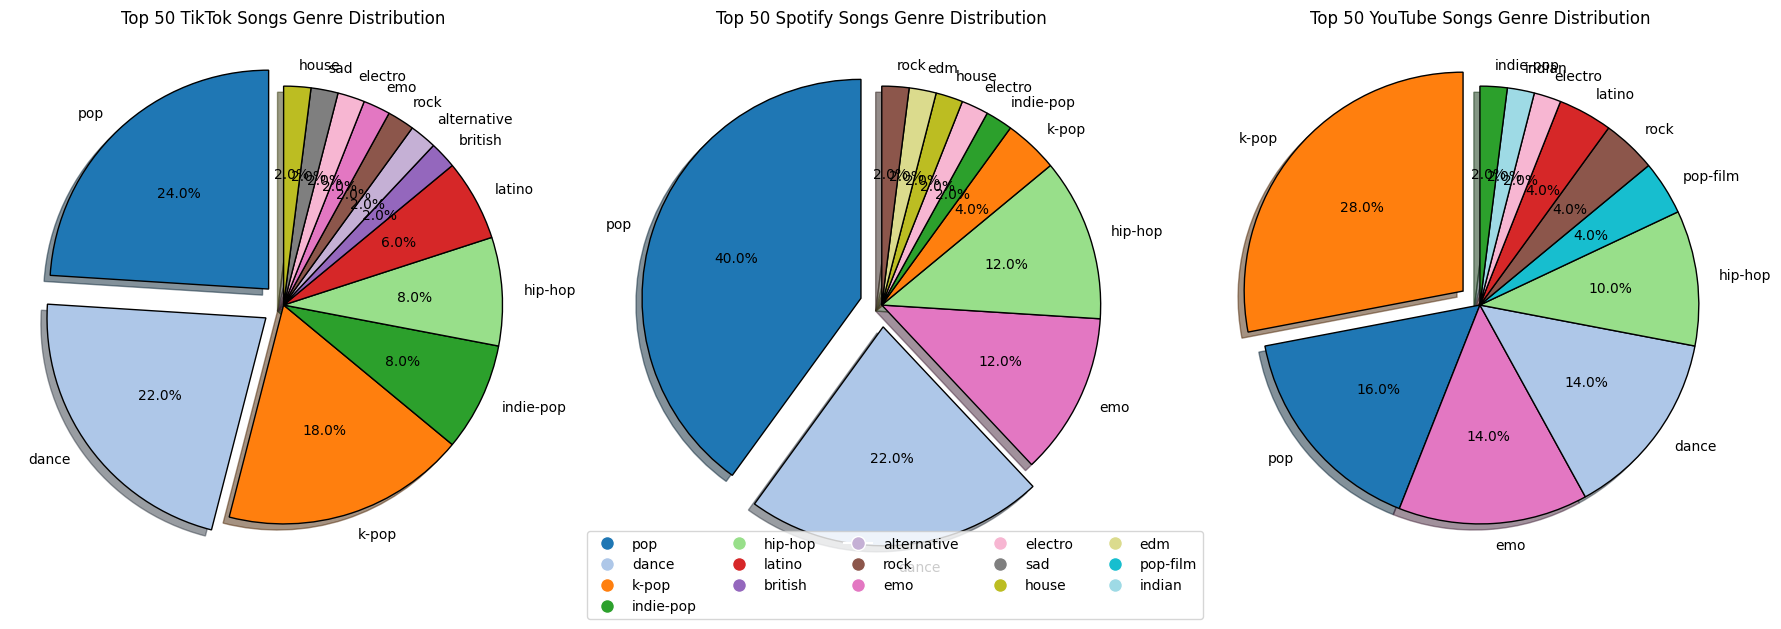

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('../../datasets/merged.csv')

# Convert 'Release Date' to datetime format and extract the release year
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%m-%Y')
df['Release Year'] = df['Release Date'].dt.year

# Filter the data for songs released between 2018 and 2022
df_filtered = df[df['Release Year'].between(2018, 2022)]

# Get top 50 songs for each platform (TikTok, Spotify, YouTube)
df_copy = df_filtered.copy()
tiktok_top_songs = df_copy.nlargest(50, 'TikTok Views').assign(Platform='TikTok')
spotify_top_songs = df_copy.nlargest(50, 'Spotify Streams').assign(Platform='Spotify')
youtube_top_songs = df_copy.nlargest(50, 'YouTube Views').assign(Platform='YouTube')

# Combine all top 50 songs into a single DataFrame
top_50_songs = pd.concat([tiktok_top_songs, spotify_top_songs, youtube_top_songs])

# Group the songs by genre for each platform
genre_distribution_tiktok = tiktok_top_songs['track_genre'].value_counts()
genre_distribution_spotify = spotify_top_songs['track_genre'].value_counts()
genre_distribution_youtube = youtube_top_songs['track_genre'].value_counts()

# Get all unique genres across platforms
all_genres = pd.concat([genre_distribution_tiktok, genre_distribution_spotify, genre_distribution_youtube]).index.unique()

# Create a color map to assign colors to genres using the 'tab20' palette
color_map = plt.cm.tab20(np.linspace(0, 1, len(all_genres)))
genre_colors = {genre: color_map[i] for i, genre in enumerate(all_genres)}

# Function to create explode list based on percentage
def get_explode_list(genre_distribution):
    explode = [0] * len(genre_distribution)
    for i, percentage in enumerate(genre_distribution / genre_distribution.sum() * 100):
        if percentage > 20:
            explode[i] = 0.1  # Offset the sections with percentage > 30% (adjust value to control the explosion)
    return explode

# Plot pie charts for each platform
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for TikTok
explode_tiktok = get_explode_list(genre_distribution_tiktok)
axes[0].pie(genre_distribution_tiktok, labels=genre_distribution_tiktok.index, autopct='%1.1f%%', startangle=90,
            colors=[genre_colors.get(genre, 'gray') for genre in genre_distribution_tiktok.index],
            explode=explode_tiktok, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
axes[0].set_title('Top 50 TikTok Songs Genre Distribution')

# Pie chart for Spotify
explode_spotify = get_explode_list(genre_distribution_spotify)
axes[1].pie(genre_distribution_spotify, labels=genre_distribution_spotify.index, autopct='%1.1f%%', startangle=90,
            colors=[genre_colors.get(genre, 'gray') for genre in genre_distribution_spotify.index],
            explode=explode_spotify, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
axes[1].set_title('Top 50 Spotify Songs Genre Distribution')

# Pie chart for YouTube
explode_youtube = get_explode_list(genre_distribution_youtube)
axes[2].pie(genre_distribution_youtube, labels=genre_distribution_youtube.index, autopct='%1.1f%%', startangle=90,
            colors=[genre_colors.get(genre, 'gray') for genre in genre_distribution_youtube.index],
            explode=explode_youtube, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1})
axes[2].set_title('Top 50 YouTube Songs Genre Distribution')

# Create a common legend for all pie charts
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_map]
labels = all_genres
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.05), ncol=5)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('../images/loop_4/top_50_songs_genre_distribution_3d_effect.png', dpi=300)
plt.show()


In [ ]:
pd.read_csv('../../datasets/merged.csv')['track_genre'].unique()

array(['k-pop', 'metal', 'emo', 'swedish', 'electro', 'dance', 'indie',
       'country', 'pop', 'house', 'rock', 'hip-hop', 'garage', 'salsa',
       'reggae', 'latino', 'indie-pop', 'edm', 'reggaeton', 'soul',
       'french', 'german', 'dancehall', 'grunge', 'r-n-b', 'british',
       'folk', 'show-tunes', 'funk', 'latin', 'acoustic',
       'progressive-house', 'sad', 'indian', 'metalcore', 'deep-house',
       'children', 'alternative', 'blues', 'pop-film', 'chicago-house',
       'piano', 'chill', 'alt-rock', 'ambient'], dtype=object)

C:\Users\Vrajnandak\AppData\Local\Temp\ipykernel_12500\2533233248.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Vrajnandak\AppData\Local\Temp\ipykernel_12500\2533233248.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Vrajnandak\AppData\Local\Temp\ipykernel_12500\2533233248.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Vrajnandak\AppData\Local\Temp\ipykernel_12500\2533233248.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

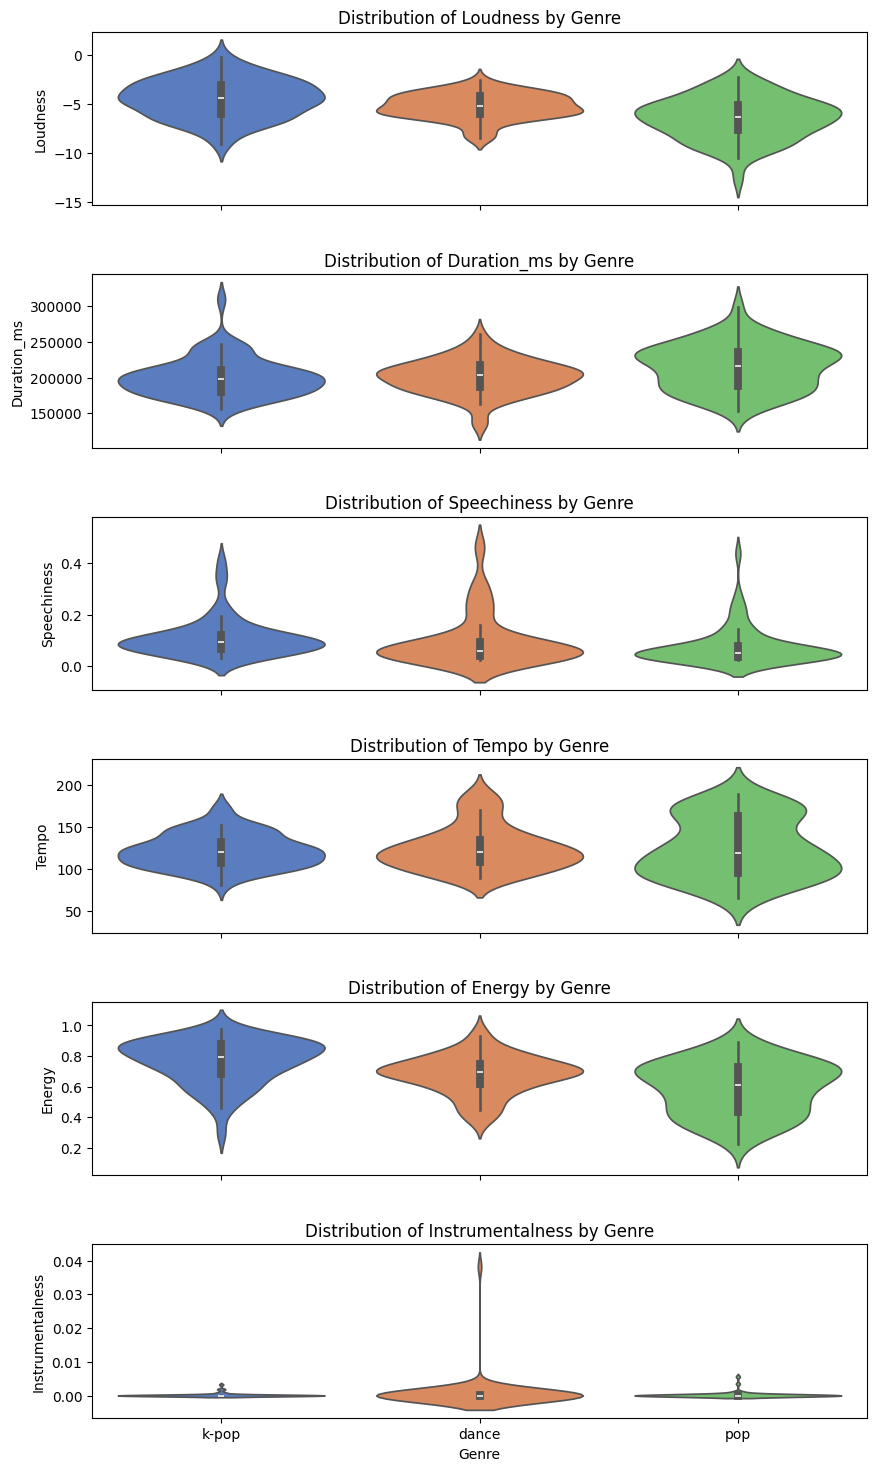

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data: Replace with your actual filtered DataFrame
# DataFrame should have columns: 'genre', 'loudness', 'duration_ms', 'speechiness', 'tempo', 'energy', 'instrumentalness'
df = pd.read_csv('../../datasets/merged.csv')  # Load the dataset

# Filter the data for the desired genres and factors
selected_genres = ['pop', 'dance','k-pop']
filtered_df = df[df['track_genre'].isin(selected_genres)]

# Define factors for visualization
factors = ['loudness', 'duration_ms', 'speechiness', 'tempo', 'energy', 'instrumentalness']

# Create the figure and subplots
fig, axes = plt.subplots(len(factors), 1, figsize=(10, 18), sharex=True)
plt.subplots_adjust(hspace=0.4)

# Generate violin plots for each factor
for i, factor in enumerate(factors):
    sns.violinplot(
        data=filtered_df,
        x='track_genre',
        y=factor,
        ax=axes[i],
        palette='muted',
        cut=2  # Includes the full range of data
    )
    axes[i].set_title(f'Distribution of {factor.capitalize()} by Genre')
    axes[i].set_xlabel('')  # Remove x-axis labels for all except the last plot
    axes[i].set_ylabel(factor.capitalize())

# Set the x-axis label for the last plot
axes[-1].set_xlabel('Genre')

# Save the plot
plt.savefig('../images/loop_4/violin_plot_full.png', dpi=300, bbox_inches='tight')
plt.show()
